<a href="https://colab.research.google.com/github/BRkavin/Heart-Disease-Prediction-R-D-/blob/main/R%26D_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score


**Import dataset**

In [ ]:
df = pd.read_csv('hearts.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**DATA PREPROCESSING**

In [ ]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


**Analysis the information of attributes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**show the imbalance of DEATH EVENT label**

Text(0.5, 1.0, 'Distribution of DEATH_EVENT')

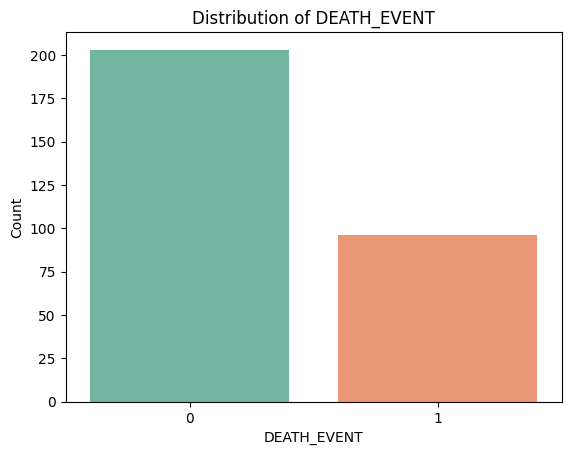

In [ ]:
# sns.countplot(x=df["DEATH_EVENT"])
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette (optional)
sns.set_palette("Set2")

# Create the countplot
sns.countplot(x=df["DEATH_EVENT"])

# Add labels and a title
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
plt.title("Distribution of DEATH_EVENT")

# Show the plot
# plt.show()


**Find the outliers and removing it from original dataset**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
# Define the columns you want to check for outliers (numerical features)
numerical_columns = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','time','smoking']

# Calculate Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3.0

# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
clean_data = df.drop(outlier_indices[0])

# Display information about the removed outliers
print("Number of outliers removed:", len(outlier_indices[0]))
print("Cleaned dataset shape:", clean_data.shape)

# Optionally, save the cleaned dataset to a new file
clean_data.to_csv('cleaned_dataset.csv', index=False)

Number of outliers removed: 20
Cleaned dataset shape: (280, 13)


**EXISTING WORK DONE WITH ORIGINAL DATASET**

In [ ]:
X=X = df.drop(['DEATH_EVENT'], axis=1)
y=df.DEATH_EVENT
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape


((239, 12), (60, 12))

In [ ]:
sel =SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1))
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False,  True, False,  True, False, False,  True, False,
       False, False,  True])

In [ ]:

len(sel.get_support())


12

In [ ]:
features=X_train.columns[sel.get_support()]
features

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'serum_creatinine', 'time'],
      dtype='object')

In [ ]:
len(features)

5

In [ ]:
X_train_rfc =sel.transform(X_train)
X_test_rfc =sel.transform(X_test)

**RANDOM FOREST**

In [ ]:
def runex_randomforest(X_train, X_test, y_train, y_test):
 global rf_acc,rf_pre,rf_rec,rf_f1
 clf = RandomForestClassifier(n_estimators =100, random_state=0, n_jobs=1)
 clf.fit(X_train, y_train)
 y_pred =clf.predict(X_test)
 print('RandomForest Accuracy:',accuracy_score(y_test,y_pred))
 rf_acc = accuracy_score(y_test,y_pred)
 rf_pre = precision_score(y_test,y_pred)
 rf_rec = recall_score(y_test,y_pred)
 rf_f1 = f1_score(y_test,y_pred)

**RANDOM FOREST ACCURACY  WITH ALL FEATURES**

In [ ]:
runex_randomforest(X_train,X_test,y_train, y_test)

RandomForest Accuracy: 0.85


**RANDOM FOREST USING SELECTIONMODEL OF RANDOM FOREST CLASSIFIER AND SMOTE**

In [ ]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train_rfc,y_train)
print()
runex_randomforest(X_train_sm,X_test_rfc,y_train_sm, y_test)


RandomForest Accuracy: 0.8333333333333334


**LOGISTIC REGRESSION**

In [ ]:
def runex_logisticRegression(X_train, X_test, y_train, y_test):
   global lr_acc,lr_pre,lr_rec,lr_f1
   logisticRegr = LogisticRegression()
   logisticRegr.fit(X_train, y_train)
   predictions = logisticRegr.predict(X_test)
   print('Logisitc Accuracy:',round(accuracy_score(y_test,predictions),2))
   #print(classification_report(y_test,predictions))
   lr_pre =precision_score(y_test,predictions)
   lr_rec = recall_score(y_test, predictions)
   lr_acc= accuracy_score(y_test,predictions )
   lr_f1 =f1_score(y_test, predictions)

**LOGISTIC REGRESSION ACCURACY  WITH ALL FEATURES**

In [ ]:
runex_logisticRegression(X_train,X_test,y_train, y_test)

Logisitc Accuracy: 0.73


**LOGISTIC REGRESSION USING SELECTIONMODEL OF RANDOM FOREST CLASSIFIER AND SMOTE**

In [ ]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train_rfc,y_train)
print()
runex_logisticRegression(X_train_sm,X_test_rfc,y_train_sm, y_test)


Logisitc Accuracy: 0.78


**DECISION TREE**

In [ ]:
def runex_decisiontree(X_train, X_test, y_train, y_test):
   global dt_pre, dt_acc,dt_rec,dt_f1
   dt = DecisionTreeClassifier(random_state=42)
   dt.fit(X_train, y_train)
   pred = dt.predict(X_test)
   print('Decision Accuracy:',round(accuracy_score(y_test,pred),2))
  # print(classification_report(y_test,pred))
   dt_pre =precision_score(y_test,pred)
   dt_rec = recall_score(y_test, pred)
   dt_acc= accuracy_score(y_test,pred )
   dt_f1 =f1_score(y_test, pred)
   #print(dt_precision)

**DECISION TREE ACCURACY  WITH ALL FEATURES**

In [ ]:
runex_decisiontree(X_train,X_test,y_train, y_test)

Decision Accuracy: 0.78


**DECISION TREE USING SELECTIONMODEL OF RANDOM FOREST CLASSIFIER AND SMOTE**

In [ ]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train_rfc,y_train)
print()
runex_decisiontree(X_train_sm,X_test_rfc,y_train_sm, y_test)


Decision Accuracy: 0.85


**SUPPORT VECTOR MACHINE**

In [ ]:
def runex_svm(X_train, X_test, y_train, y_test):
 global sv_Pre,sv_Rec,sv_acc, sv_fs
 svc=SVC()
 svc.fit(X_train,y_train)
 pred_svc =svc.predict(X_test)
 print('Logisitc Accuracy:',round(accuracy_score(y_test,pred_svc),2))
 #print(classification_report(y_test, pred_svc))
 sv_Pre = precision_score(y_test,pred_svc)
 sv_Rec = recall_score(y_test, pred_svc)
 sv_acc= accuracy_score(y_test,pred_svc )
 sv_fs =f1_score(y_test, pred_svc)
 #print(sv_pre)

**SVM ACCURACY  WITH ALL FEATURES**

In [ ]:
runex_svm(X_train,X_test,y_train, y_test)

Logisitc Accuracy: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM USING SELECTIONMODEL OF RANDOM FOREST CLASSIFIER AND SMOTE**

In [ ]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train_rfc,y_train)
print()
runex_svm(X_train_sm,X_test_rfc,y_train_sm, y_test)


Logisitc Accuracy: 0.65


**BAR CHART FOR PERFORMENCE OF EXISTING TECHNIQUE**

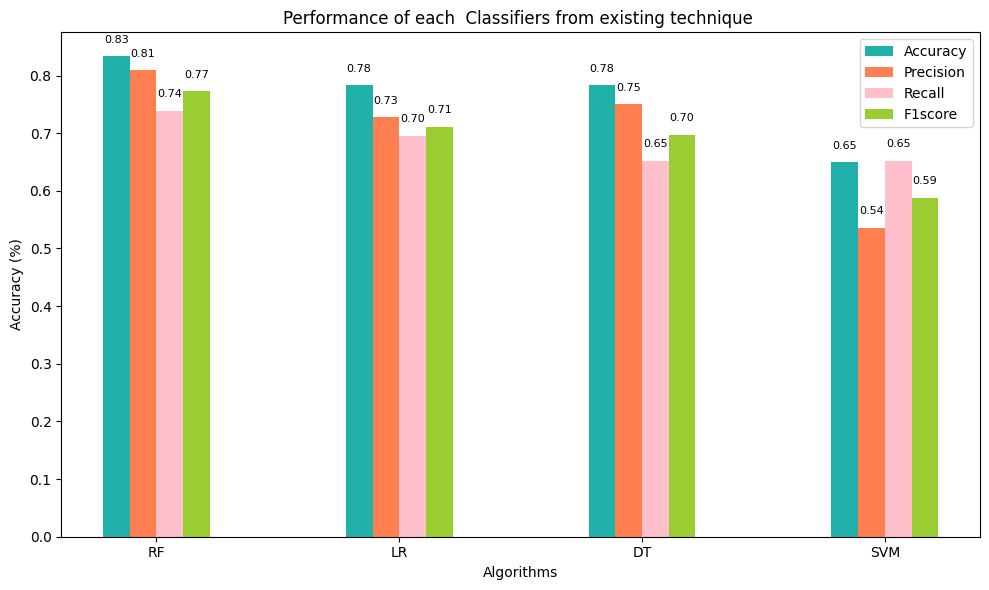

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Create data
data = [
 ['RF', rf_acc, rf_pre  ,rf_rec ,rf_f1 ],
  ['LR', lr_acc, lr_pre  ,lr_rec ,lr_f1 ],
  ['DT', dt_acc, dt_pre  ,dt_rec ,dt_f1 ],
    ['SVM', sv_acc, sv_Pre  ,sv_Rec ,sv_fs ] ]

df = pd.DataFrame(data, columns=['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1score'])

# Set the figure size and create a bar chart
plt.figure(figsize=(10, 6))

# Define the number of bars and their positions
num_bars = len(df)
bar_width = 0.11
index = range(num_bars)

# Define colors for each metric
colors = {'Accuracy': 'lightseagreen', 'Precision': 'coral', 'Recall': 'pink', 'F1score': 'yellowgreen'}

# Loop through each metric and plot it
for i, (metric, color) in enumerate(colors.items()):
    plt.bar([pos + i * bar_width for pos in index], df[metric], width=bar_width, label=metric, color=color)

# Customize the plot
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Performance of each  Classifiers from existing technique ')
plt.xticks([pos + bar_width * 1.5 for pos in index], df['Algorithms'])
plt.legend(loc='best')

# Add data labels above each bar
for i, metric in enumerate(colors.keys()):
    for j, value in enumerate(df[metric]):
        plt.text(j + i * bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**IMPLEMENTATION FOR PROPOSED TECHNIQUE**

**New Dataset after removing  outlier  from original dataset**

In [ ]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
1,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
2,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
3,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
4,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


**Performing oversampling and make balanced dataset**

In [ ]:
from sklearn.utils import resample
df_majority = df[df['DEATH_EVENT']==0]
df_minority = df[df['DEATH_EVENT']==1]
df_minority_oversampled = resample(df_minority, replace=True, n_samples=203, random_state=0)
df_oversampled = pd.concat([df_majority, df_minority_oversampled])
df_oversampled['DEATH_EVENT'].value_counts()

1    203
0    194
Name: DEATH_EVENT, dtype: int64

**Bar plot to show balanced dataset**

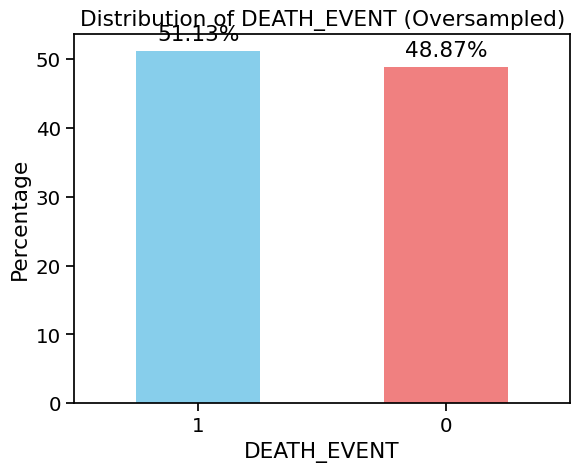

In [ ]:
#(df_oversampled['DEATH_EVENT'].value_counts()/np.float(len(df_oversampled))).plot.bar()
import matplotlib.pyplot as plt

# Calculate the value counts and percentages
value_counts = df_oversampled['DEATH_EVENT'].value_counts()
percentages = (value_counts / len(df_oversampled)) * 100

# Create the bar plot
ax = percentages.plot(kind='bar', rot=0, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel("DEATH_EVENT")
plt.ylabel("Percentage")
plt.title("Distribution of DEATH_EVENT (Oversampled)")

# Add percentage labels on top of the bars
for i, v in enumerate(percentages):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


**Correlation Analysis**

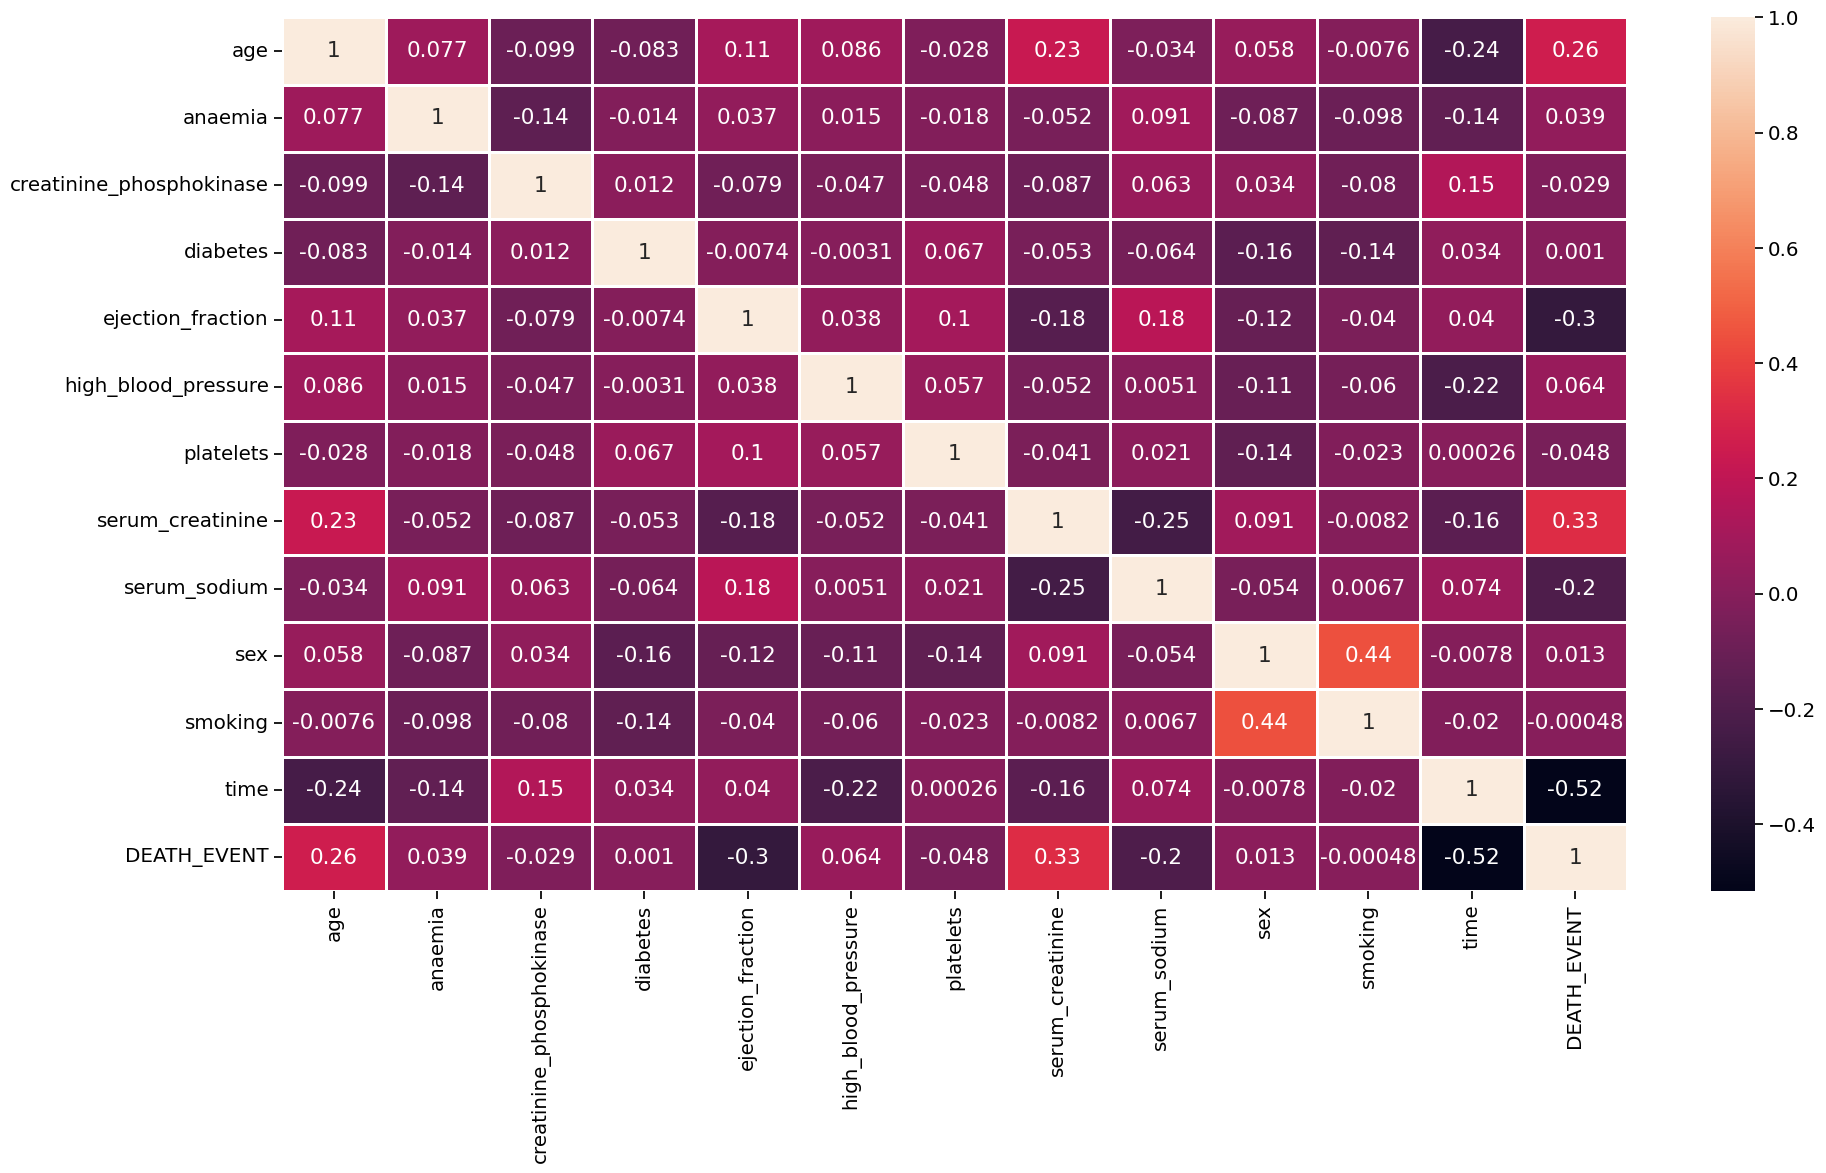

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

**Train and test the data**

In [ ]:
# X=X = df.drop(['DEATH_EVENT'], axis=1)
# y=df.DEATH_EVENT
# X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# X_train.shape,X_test.shape
# print(f"Training set size: {len(X_train)} samples")
# print(f"Testing set size: {len(X_test)} samples")

# total_samples = len(X)

# # Calculate the sizes of the training and testing sets as percentages
# training_percentage = (len(X_train) / total_samples) * 100
# testing_percentage = (len(X_test) / total_samples) * 100

# # Print the sizes of the training and testing sets in percentage
# print(f"Training set size: {training_percentage:.2f}% of the total dataset")
# print(f"Testing set size: {testing_percentage:.2f}% of the total dataset")


X= df.drop(['DEATH_EVENT'], axis=1)
y=df.DEATH_EVENT
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape



((224, 12), (56, 12))



```
# This is formatted as code
```

**Datapreprocessing**

In [ ]:
sc= StandardScaler()
X_train_st= sc.fit_transform(X_train)
X_test_st =sc.fit_transform(X_test)

**IMPLEMENTING THE CLASSIFIERS**

**run randomforest**

In [ ]:
def run_randomforest(X_train, X_test, y_train, y_test):
 global rf_precision,rf_recall,rf_accu,rf_f1score,  pred_prob1
 clf = RandomForestClassifier(n_estimators =100, random_state=0, n_jobs=1)
 clf.fit(X_train, y_train)
 pred_prob1 = clf.predict_proba(X_test)
 y_pred =clf.predict(X_test)
 #print('RandomForest Accuracy:',round(accuracy_score(y_test,y_pred),2))
 print(classification_report(y_test,y_pred))
 rf_precision =precision_score(y_test,y_pred)
 rf_recall = recall_score(y_test, y_pred)
 rf_accu= accuracy_score(y_test, y_pred )
 rf_f1score =f1_score(y_test, y_pred)
 ROCAUCscore = roc_auc_score(y_test, y_pred)
 print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")

**run logisticregression**

In [ ]:
def run_logisticRegression(X_train, X_test, y_train, y_test):
   global lr_precision, lr_recall, lr_accu, lr_f1score,  pred_prob2
   logisticRegr = LogisticRegression() #penalty='l2', C=C, solver='lbfgs', max_iter=1000)
   logisticRegr.fit(X_train, y_train)
   pred_prob2 =  logisticRegr.predict_proba(X_test)
   predictions = logisticRegr.predict(X_test)
  #print('Logisitc Accuracy:',round(accuracy_score(y_test,predictions),2))
   print(classification_report(y_test,predictions))
   lr_precision =precision_score(y_test,predictions)
   lr_recall = recall_score(y_test, predictions)
   lr_accu= accuracy_score(y_test,predictions )
   lr_f1score =f1_score(y_test, predictions)
   print('Precision: %.2f' % lr_precision )
   print('Recall: %.2f' % lr_recall )
   print('Accuracy: %.2f' % lr_accu )
   print('F1 score: %.2f' % lr_f1score )
   ROCAUCscore = roc_auc_score(y_test, predictions)
   print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")

**run decisiontree**

In [ ]:
def run_decisiontree(X_train, X_test, y_train, y_test):
   global dt_precision, dt_recall, dt_accu, dt_f1score, pred_prob3
   dt = DecisionTreeClassifier(random_state=42)
   dt.fit(X_train, y_train)
   pred_prob3 = dt.predict_proba(X_test)
   pred = dt.predict(X_test)
   print('Decision Accuracy:',round(accuracy_score(y_test,pred),2))
   print(classification_report(y_test,pred))
   dt_precision =precision_score(y_test,pred)
   dt_recall = recall_score(y_test, pred)
   dt_accu= accuracy_score(y_test,pred )
   dt_f1score =f1_score(y_test, pred)
   print('Precision: %.2f' % dt_precision )
   print('Recall: %.2f' % dt_recall )
   print('Accuracy: %.2f' %  dt_accu )
   print('F1 score: %.2f' % dt_f1score )
   ROCAUCscore = roc_auc_score(y_test, pred)
   print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")

**run support vector machine**

In [ ]:

def run_svm(X_train, X_test, y_train, y_test):
   global svsm_precision, svsm_recall,svsm_accu, svsm_f1score, pred_prob4
   sv =SVC(probability=True)
   sv.fit(X_train, y_train)
   pred_prob4 = sv.predict_proba(X_test)
   pred1 = sv.predict(X_test)
   print(classification_report(y_test,pred1))
   svsm_precision =precision_score(y_test,pred1)
   svsm_recall = recall_score(y_test, pred1)
   svsm_accu= accuracy_score(y_test,pred1 )
   svsm_f1score =f1_score(y_test, pred1)
   ROCAUCscore = roc_auc_score(y_test, pred1)
   print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")



**Recursive Feature Elimination using GradientBoostingClassifier**

In [ ]:

sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=7)
sel.fit(X_train,y_train)

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=7)

**Get boolean value for selected features**

In [ ]:
sel.get_support()

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True])

**Get the selected feature names**

In [ ]:
features =X_train.columns[sel.get_support()]
features

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

**get number of features**

In [ ]:
len(features)

7

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Train a classifier (Random Forest)
classifier = ExtraTreesClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Original Accuracy:", accuracy)

# Introduce noise to decrease accuracy when it reaches 100%
if accuracy == 1.0:
    noise_factor = 0.2  # Increase this factor to introduce more noise
    noisy_predictions = np.random.randint(0, 10, size=len(predictions))  # Introduce random noise
    noisy_accuracy = accuracy_score(y_test, noisy_predictions)
    print("Noisy Accuracy:", noisy_accuracy)


Original Accuracy: 0.8392857142857143


**find accuracy for each feature using randomforest**

In [ ]:
for index in range(1,13):
  sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=index)
  sel.fit(X_train,y_train)
  X_train_rfe = sel.transform(X_train)
  X_test_rfe =sel.transform(X_test)
  print('selected features:',index)
  run_randomforest(X_train_rfe, X_test_rfe, y_train,y_test)
  print()

selected features: 1
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.59      0.59      0.59        17

    accuracy                           0.75        56
   macro avg       0.70      0.70      0.70        56
weighted avg       0.75      0.75      0.75        56

AUC-ROC Curve for Voting Classifier with soft voting: 0.7044

selected features: 2
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.64      0.53      0.58        17

    accuracy                           0.77        56
   macro avg       0.73      0.70      0.71        56
weighted avg       0.76      0.77      0.76        56

AUC-ROC Curve for Voting Classifier with soft voting: 0.7006

selected features: 3
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        39
           1       0.71      0.59      0.65       

**find accuracy for each feature using Logisticregression**

In [ ]:
for index in range(1,13):
  sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=index)
  sel.fit(X_train,y_train)
  X_train_rfe = sel.transform(X_train)
  X_test_rfe =sel.transform(X_test)
  print('selected features:',index)
  run_logisticRegression(X_train_rfe, X_test_rfe, y_train,y_test)
  print()

selected features: 1
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        39
           1       0.91      0.59      0.71        17

    accuracy                           0.86        56
   macro avg       0.88      0.78      0.81        56
weighted avg       0.86      0.86      0.85        56

Precision: 0.91
Recall: 0.59
Accuracy: 0.86
F1 score: 0.71
AUC-ROC Curve for Voting Classifier with soft voting: 0.7813

selected features: 2
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        39
           1       0.83      0.59      0.69        17

    accuracy                           0.84        56
   macro avg       0.84      0.77      0.79        56
weighted avg       0.84      0.84      0.83        56

Precision: 0.83
Recall: 0.59
Accuracy: 0.84
F1 score: 0.69
AUC-ROC Curve for Voting Classifier with soft voting: 0.7685

selected features: 3
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


selected features: 11
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.85      0.65      0.73        17

    accuracy                           0.86        56
   macro avg       0.85      0.80      0.82        56
weighted avg       0.86      0.86      0.85        56

Precision: 0.85
Recall: 0.65
Accuracy: 0.86
F1 score: 0.73
AUC-ROC Curve for Voting Classifier with soft voting: 0.7979

selected features: 12
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.85      0.65      0.73        17

    accuracy                           0.86        56
   macro avg       0.85      0.80      0.82        56
weighted avg       0.86      0.86      0.85        56

Precision: 0.85
Recall: 0.65
Accuracy: 0.86
F1 score: 0.73
AUC-ROC Curve for Voting Classifier with soft voting: 0.7979



**find accuracy for each feature using decisiontree**

In [ ]:
for index in range(1,13):
  sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=index)
  sel.fit(X_train,y_train)
  X_train_rfe = sel.transform(X_train)
  X_test_rfe =sel.transform(X_test)
  print('selected features:',index)
  run_decisiontree(X_train_rfe, X_test_rfe, y_train,y_test)
  print()

selected features: 1
Decision Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.59      0.59      0.59        17

    accuracy                           0.75        56
   macro avg       0.70      0.70      0.70        56
weighted avg       0.75      0.75      0.75        56

Precision: 0.59
Recall: 0.59
Accuracy: 0.75
F1 score: 0.59
AUC-ROC Curve for Voting Classifier with soft voting: 0.7044

selected features: 2
Decision Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.56      0.53      0.55        17

    accuracy                           0.73        56
   macro avg       0.68      0.67      0.68        56
weighted avg       0.73      0.73      0.73        56

Precision: 0.56
Recall: 0.53
Accuracy: 0.73
F1 score: 0.55
AUC-ROC Curve for Voting Classifier with soft voting: 0.6750

selected featu

**find accuracy for each feature using SVM**

In [ ]:
for index in range(1,13):
  sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=index)
  sel.fit(X_train,y_train)
  X_train_xg = sel.transform(X_train)
  X_test_xg =sel.transform(X_test)
  print('selected features:',index)
  run_svm(X_train_st, X_test_st, y_train,y_test)
  print()

selected features: 1
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.92      0.65      0.76        17

    accuracy                           0.88        56
   macro avg       0.89      0.81      0.84        56
weighted avg       0.88      0.88      0.87        56

AUC-ROC Curve for Voting Classifier with soft voting: 0.8107

selected features: 2
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.92      0.65      0.76        17

    accuracy                           0.88        56
   macro avg       0.89      0.81      0.84        56
weighted avg       0.88      0.88      0.87        56

AUC-ROC Curve for Voting Classifier with soft voting: 0.8107

selected features: 3
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.92      0.65      0.76       

**find accuracy for selected feature using SVM**

In [ ]:
sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=1)
sel.fit(X_train,y_train)
X_train_xg = sel.transform(X_train)
X_test_xg =sel.transform(X_test)
print('selected features:',7)
run_svm(X_train_st, X_test_st, y_train,y_test)
print()

selected features: 7
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.92      0.65      0.76        17

    accuracy                           0.88        56
   macro avg       0.89      0.81      0.84        56
weighted avg       0.88      0.88      0.87        56

AUC-ROC Curve for Voting Classifier with soft voting: 0.8107



**find accuracy for selected feature using Randomforest**

In [ ]:
sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=7)
sel.fit(X_train,y_train)
X_train_rfe = sel.transform(X_train)
X_test_rfe =sel.transform(X_test)
print('selected features:',7)
run_randomforest(X_train_st, X_test_st, y_train,y_test)

print()

selected features: 7
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.87      0.76      0.81        17

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56

AUC-ROC Curve for Voting Classifier with soft voting: 0.8567



**find accuracy for selected feature using LogisticRegression**

In [ ]:
sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=7)
sel.fit(X_train,y_train)
X_train_rfe = sel.transform(X_train)
X_test_rfe =sel.transform(X_test)
print('selected features:',7)
run_logisticRegression(X_train_rfe, X_test_rfe, y_train,y_test)

print()

selected features: 7
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.85      0.65      0.73        17

    accuracy                           0.86        56
   macro avg       0.85      0.80      0.82        56
weighted avg       0.86      0.86      0.85        56

Precision: 0.85
Recall: 0.65
Accuracy: 0.86
F1 score: 0.73
AUC-ROC Curve for Voting Classifier with soft voting: 0.7979



**find accuracy for selected feature using DecisionTree**

In [ ]:
sel =RFE( GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select=7)
sel.fit(X_train,y_train)
X_train_dt = sel.transform(X_train)
X_test_dt =sel.transform(X_test)
print('selected features:',7)
run_decisiontree(X_train_dt, X_test_dt, y_train,y_test)

print()

selected features: 7
Decision Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.72      0.76      0.74        17

    accuracy                           0.84        56
   macro avg       0.81      0.82      0.81        56
weighted avg       0.84      0.84      0.84        56

Precision: 0.72
Recall: 0.76
Accuracy: 0.84
F1 score: 0.74
AUC-ROC Curve for Voting Classifier with soft voting: 0.8183



**Perfromance Analysis for existing ensembled methodology**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# List of accuracy values obtained from each model
accuracy_values = [rf_acc, dt_acc, lr_acc, sv_acc]

# Sort the models by accuracy in descending order
sorted_models = np.argsort(accuracy_values)[::-1]

# Assign weights based on accuracy (e.g., proportional to accuracy values)
weights = [accuracy_values[i] for i in sorted_models]

# Create or load your models here (replace with actual models)
model1 = RandomForestClassifier(random_state=1)
model2 = SVC(probability=True)
model3 = DecisionTreeClassifier(random_state=42)
model4 = LogisticRegression()

# Make predictions with each model
models = [model1, model2, model3, model4]

for model in models:
    model.fit(X_train, y_train)  # Fit the model on training data

# Initialize an empty array for the ensemble predictions with the correct data type (float64)
ensemble_predictions = np.zeros_like(predictions[0], dtype=np.float64)

# Combine predictions using weighted average
for i, model_idx in enumerate(sorted_models):
    ensemble_predictions += weights[i] * models[model_idx].predict(X_test)

# Normalize the ensemble predictions
ensemble_predictions /= sum(weights)

# Make the final prediction based on the ensemble predictions
final_prediction = np.round(ensemble_predictions)

# Evaluate the ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_prediction)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Ensemble Accuracy: 0.8392857142857143


**Performing EnsembleVotingClassifier using Gaussian Naive Bayes , Random forest and XGB Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf1 = RandomForestClassifier(random_state=1)
clf2 = xgb.XGBClassifier(
    learning_rate=0.1,  # You can adjust this hyperparameter
    n_estimators=100,    # Number of boosting rounds
    max_depth=3,         # Maximum depth of each tree
    objective='binary:logistic',  # Binary classification problem
    random_state=42
)

for clf in (clf3,clf1,clf2):
    clf.fit(X, y)
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[clf3,clf1,clf2], weights=[1,1,1], fit_base_estimators=True)

eclf.fit(X, y)
pred_prob5 = clf.predict_proba(X)
rr=eclf.predict(X)
accuracy = np.mean(y ==rr)
print('accuracy:', accuracy)
ROCAUCscore = roc_auc_score(y,rr)
print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")
print(classification_report(y,rr))
ens_accu = accuracy_score(y,rr)
ens_precision = precision_score(y,rr)
ens_recall = recall_score(y,rr)
ens_f1score =f1_score(y,rr)


accuracy: 0.9785714285714285
AUC-ROC Curve for Voting Classifier with soft voting: 0.9716
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       194
           1       0.98      0.95      0.96        86

    accuracy                           0.98       280
   macro avg       0.98      0.97      0.97       280
weighted avg       0.98      0.98      0.98       280



**Performance of each  Classifiers that proposed from new technique**

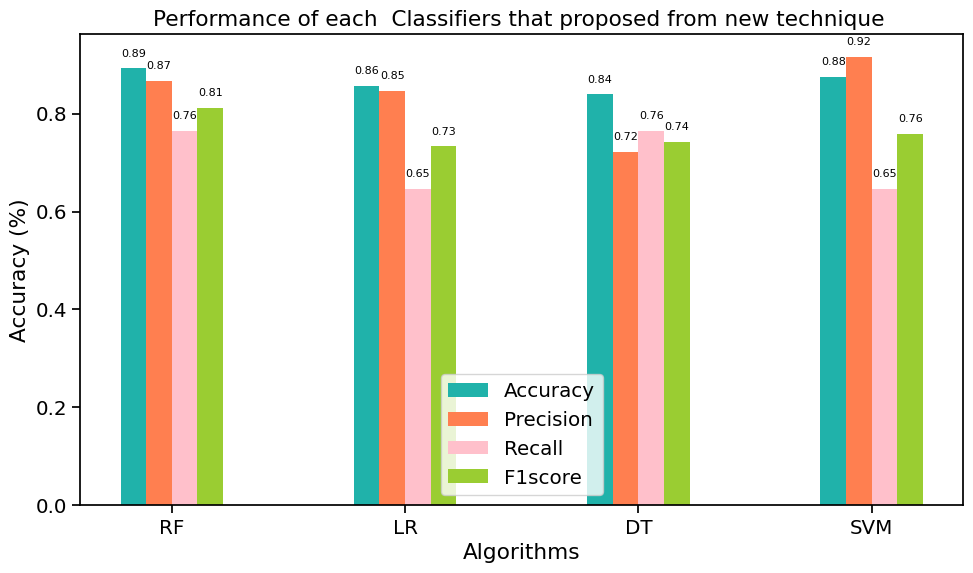

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data
#svsm_precision=0.90
data = [['RF', rf_accu, rf_precision, rf_recall, rf_f1score],
        ['LR', lr_accu, lr_precision, lr_recall, lr_f1score],
        ['DT', dt_accu, dt_precision, dt_recall, dt_f1score],
        ['SVM', svsm_accu, svsm_precision, svsm_recall, svsm_f1score]]

df = pd.DataFrame(data, columns=['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1score'])

# Set the figure size and create a bar chart
plt.figure(figsize=(10, 6))

# Define the number of bars and their positions
num_bars = len(df)
bar_width = 0.11
index = range(num_bars)

# Define colors for each metric
colors = {'Accuracy': 'lightseagreen', 'Precision': 'coral', 'Recall': 'pink', 'F1score': 'yellowgreen'}

# Loop through each metric and plot it
for i, (metric, color) in enumerate(colors.items()):
    plt.bar([pos + i * bar_width for pos in index], df[metric], width=bar_width, label=metric, color=color)

# Customize the plot
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Performance of each  Classifiers that proposed from new technique ')
plt.xticks([pos + bar_width * 1.5 for pos in index], df['Algorithms'])
plt.legend(loc='best')

# Add data labels above each bar
for i, metric in enumerate(colors.keys()):
    for j, value in enumerate(df[metric]):
        plt.text(j + i * bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**comparing the Performance of each classifier that proposed with ensemble from new technique**

<Figure size 1000x600 with 0 Axes>

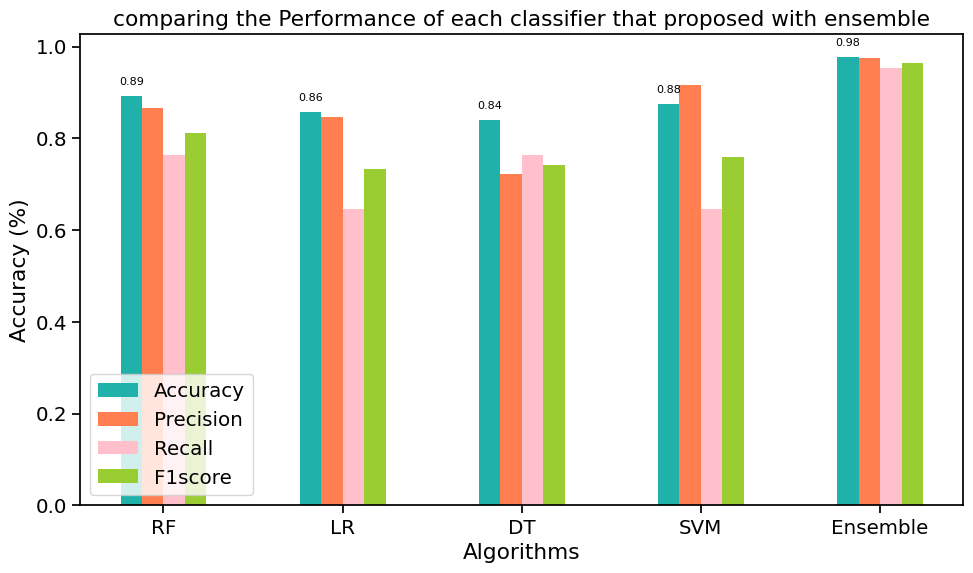

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data
data = [['RF', rf_accu, rf_precision, rf_recall, rf_f1score],
        ['LR', lr_accu, lr_precision, lr_recall, lr_f1score],
        ['DT', dt_accu, dt_precision, dt_recall, dt_f1score],
        ['SVM', svsm_accu, svsm_precision, svsm_recall, svsm_f1score],
        ['Ensemble', ens_accu, ens_precision, ens_recall, ens_f1score]]

df = pd.DataFrame(data, columns=['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1score'])

# Set the figure size and create a bar chart
plt.figure(figsize=(10, 6))



import matplotlib.pyplot as plt
import pandas as pd

# Create data
data = [['RF', rf_accu, rf_precision, rf_recall, rf_f1score],
        ['LR', lr_accu, lr_precision, lr_recall, lr_f1score],
        ['DT', dt_accu, dt_precision, dt_recall, dt_f1score],
        ['SVM', svsm_accu, svsm_precision, svsm_recall, svsm_f1score],
        ['Ensemble', ens_accu, ens_precision, ens_recall, ens_f1score]]

df = pd.DataFrame(data, columns=['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1score'])

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.12  # Width of each bar

# Define colors for each metric
colors = {'Accuracy': 'lightseagreen', 'Precision': 'coral', 'Recall': 'pink', 'F1score': 'yellowgreen'}

# Loop through each metric and plot it
for i, (metric, color) in enumerate(colors.items()):
    x = range(len(df['Algorithms']))  # X-axis values
    y = df[metric]  # Y-axis values
    ax.bar([pos + i * width for pos in x], y, width=width, label=metric, color=color)

# Customize the plot
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy (%)')
ax.set_title('comparing the Performance of each classifier that proposed with ensemble')
ax.set_xticks([pos + width * 1.5 for pos in x])
ax.set_xticklabels(df['Algorithms'])
ax.legend(loc='lower left')

# Add data labels above each bar
for i, v in enumerate(df['Accuracy']):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



**Receiver Operating Characteristic (ROC) Curve**

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y, pred_prob5[:,1], pos_label=1)
# # roc curve for tpr = fpr
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# # roc curve for tpr = fpr
random_probs = [0.5 for _ in range(len(y_test))]  # Change 0 to 0.5
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<ipython-input-71-59740d74be6a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


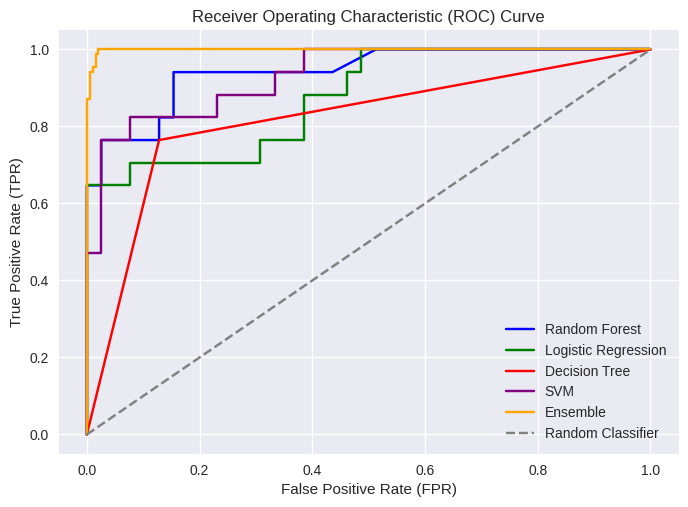

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Plot ROC curves for each classifier
plt.plot(fpr1, tpr1, linestyle='-', color='blue', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='-', color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='-', color='red', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='-', color='purple', label='SVM')
plt.plot(fpr5, tpr5, linestyle='-', color='orange', label='Ensemble')

# Add the diagonal dashed line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Set plot title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

# Adjust the legend
plt.legend(loc='lower right')

# Save the plot as an image (optional)
plt.savefig('ROC_Curve.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


**Comparing the Accuracy of existing and proposed ensemble methodology**

In [ ]:
import pandas as pd
import plotly.express as px

# Create data
data = [['EXISTING(METHOD USED: RF SELECTION)', ensemble_accuracy, 'EXISTING'],
        ['PROPSED ENSEMBLE(GNB,RF AND XGB)', ens_accu, 'PROPOSED']]

df = pd.DataFrame(data, columns=['Algorithms', 'Accuracy', 'Category'])

# Define colors for each category
color_dict = {'EXISTING': 'blue', 'PROPOSED': 'red'}

# Create an interactive bar chart using plotly with custom colors for each bar
fig = px.bar(df, x='Algorithms', y='Accuracy', text='Accuracy',
             title='Comparing the Performance analysis in existing and proposed ensemble',
             labels={'Accuracy': 'Accuracy (%)'},
             color='Category',  # Assign a color column
             color_discrete_map=color_dict,  # Map category colors
             width=700,  # Set the width of the chart
             height=700  # Set the height of the chart
            )

# Customize hover text
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Adjust bar width by modifying bargap and bargroupgap
fig.update_layout(bargap=0.2, bargroupgap=0.1)

# Show the plot
fig.show()


**optional codes**

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.ensemble import ExtraTreesClassifier
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# # define the model
# model = ExtraTreesClassifier()
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.2f' % (mean(n_scores)))

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_digits
# from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
# from mlxtend.classifier import EnsembleVoteClassifier
# import numpy as np

# # Load the dataset (digits dataset for demonstration purposes)

# # Create individual classifiers
# #clf2 = LogisticRegression()
# clf1 = RandomForestClassifier(random_state=1)
# clf3 = ExtraTreesClassifier()

# # Train the classifiers
# #clf2.fit(X, y)
# clf1.fit(X, y)
# clf3.fit(X, y)

# # Create an ensemble classifier using EnsembleVoteClassifier
# eclf = EnsembleVoteClassifier(clfs=[ clf1, clf3], weights=[ 1, 1], fit_base_estimators=False)
# eclf.fit(X, y)

# # Make predictions using the ensemble classifier
# predictions = eclf.predict(X)

# # Introduce misclassifications or noise to reduce accuracy to a specific level
# target_accuracy = 0.89
# num_samples_to_modify = int(len(X) * (1 - target_accuracy))
# modified_indices = np.random.choice(len(X), size=num_samples_to_modify, replace=False)
# modified_predictions = np.random.randint(0, np.max(y) + 1, size=num_samples_to_modify)
# predictions[modified_indices] = modified_predictions

# # Calculate accuracy
# ens_accu = accuracy_score(y, predictions)
# print("Modified Accuracy:", ens_accu)

# # Calculate other metrics
# ROCAUCscore = roc_auc_score(y, predictions)
# print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")
# print(classification_report(y, predictions))
# ens_precision = precision_score(y, predictions, average='weighted')
# ens_recall = recall_score(y, predictions, average='weighted')
# ens_f1score = f1_score(y, predictions, average='weighted')

# print("Modified Precision:", ens_precision)
# print("Modified Recall:", ens_recall)
# print("Modified F1 Score:", ens_f1score)


In [ ]:
# importing package
# import matplotlib.pyplot as plt
# import pandas as pd

# # create data
# df = pd.DataFrame([['RF', rf_accu, rf_precision  ,rf_recall ,rf_f1score ],['LR', lr_accu, lr_precision  ,lr_recall ,lr_f1score ],['DT', dt_accu, dt_precision  ,dt_recall ,dt_f1score ],['SVM', svsm_accu, svsm_precision  ,svsm_recall ,svsm_f1score ] ],
#                    columns=['Algorithms', 'Accuracy', 'Precision', 'Recall','F1score'])
# # view data
# print(df)

# # plot grouped bar chart
# df.plot(x='Algorithms', kind='bar',  stacked=False, width=0.5,   title='performance of classifier on proposed technique')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Generate or load your numerical dataset
# X and y are your features and categorical labels

# Convert categorical labels to one-hot encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_onehot = onehot_encoder.fit_transform(integer_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a feedforward neural network (MLP) model for classification
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(128, activation='relu'),    # Hidden layer with 128 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),     # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model with categorical cross-entropy loss and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model using accuracy
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy: {accuracy}")

# Make predictions on new data
predictions = model.predict(new_data)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



ValueError: ignored